# Eye State Classification EEG Dataset
- Date : 2024-07-14

## dataset
모든 데이터는 Emotiv EEG Neuroheadset을 사용하여 한 번의 연속적인 EEG 측정을 통해 얻은 데이터이다.  
- 측정 시간 : 117초
- columns
    - AF3 : 좌반구 앞전두엽(Left Anterior Frontal) 
    - F7  : 좌반구 전두엽(Left Frontal)
    - F3  : 좌반구 전두엽(Left Frontal)
    - FC5 : 좌반구 전두중심엽(Left Frontal central)
    - T7  : 좌반구 측두엽(Left Temporal)
    - P7  : 좌반구 두정엽(Left Parietal)
    - O1  : 좌반구 후두엽(Left Occipital)
    - O2  : 우반구 후두엽(Right Occipital)
    - P8  : 우반구 두정엽(Right Parietal)
    - T8  : 우반구 측두엽(Right Temporal)
    - FC6 : 우반구 전두중심엽(Right Frontal central)
    - F4  : 우반구 전두엽(Right Frontal)
    - F8  : 우반구 전두엽(Right Anterior Frontal)
    - AF4 : 우반구 앞전두엽(Right)
    - eyeDetection(taget) :  
        - 1 : 눈을 감은 상태
        - 0 : 눈을 뜬 상태



In [45]:
# 라이브러리 불러오기
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
from IPython.display import display
from scipy import stats
from scipy.linalg import eigh
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from scipy.signal import butter, filtfilt

In [53]:
data = pd.read_csv("/Users/bumsoojoe/Desktop/Project/EEG_to_ai/data/EEG_Eye_State_Classification.csv")
data

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


In [61]:
data[data["eyeDetection"] == 1]

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
188,4445.13,4017.95,4292.82,4121.54,4325.13,4591.79,4077.44,4628.72,4229.23,4273.33,4316.92,4350.77,4810.26,4552.82,1
189,4438.46,4005.64,4287.69,4120.51,4321.03,4589.74,4070.77,4628.21,4224.10,4272.82,4319.49,4356.41,4811.28,4546.67,1
190,4432.31,3998.46,4281.54,4115.38,4314.87,4583.59,4063.59,4621.03,4204.10,4255.38,4304.10,4351.28,4795.90,4533.85,1
191,4427.18,3990.26,4281.03,4107.18,4310.77,4574.87,4061.03,4608.21,4188.21,4238.97,4297.44,4343.08,4783.59,4530.77,1
192,4426.67,3987.69,4285.13,4108.21,4314.36,4575.90,4063.59,4594.87,4181.54,4235.38,4301.54,4345.13,4784.10,4533.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


In [54]:
data.shape

(14980, 15)

In [55]:
print(data.columns)

Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4', 'eyeDetection'],
      dtype='object')


In [56]:
data.isnull().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

In [57]:
data.duplicated().sum()

0

<Axes: xlabel='eyeDetection'>

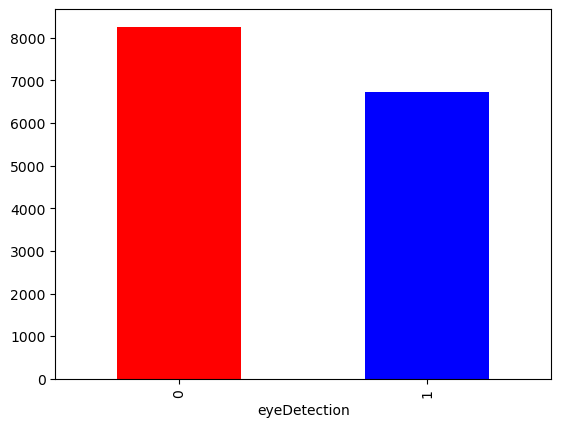

In [58]:
colors = ["red", "blue"]
data.eyeDetection.value_counts().plot(kind="bar",color=colors)

In [59]:
data.eyeDetection.value_counts(normalize=True)

eyeDetection
0    0.551202
1    0.448798
Name: proportion, dtype: float64

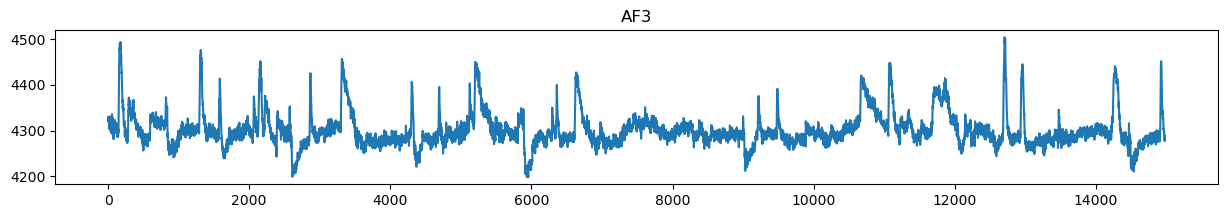

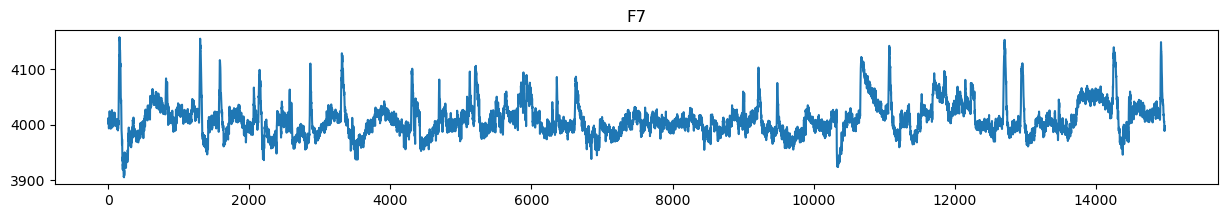

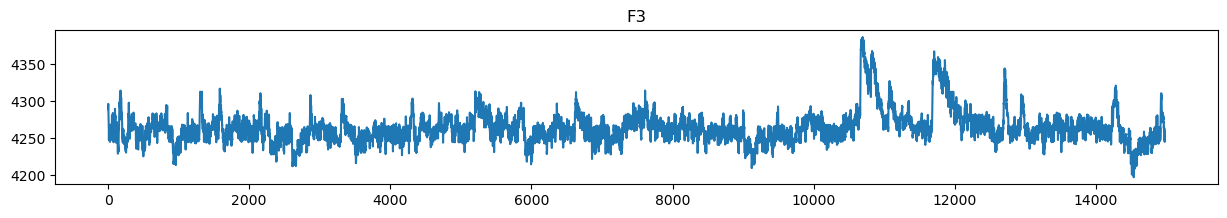

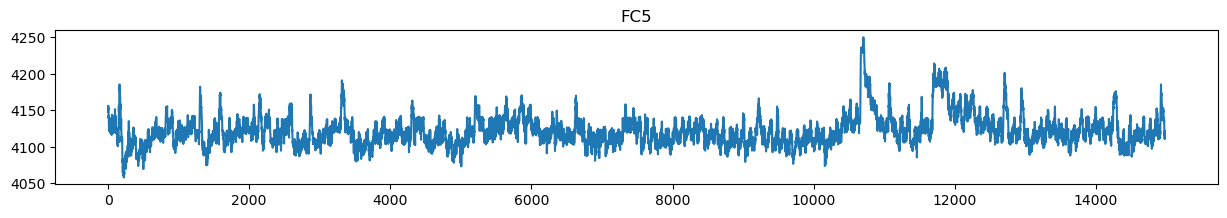

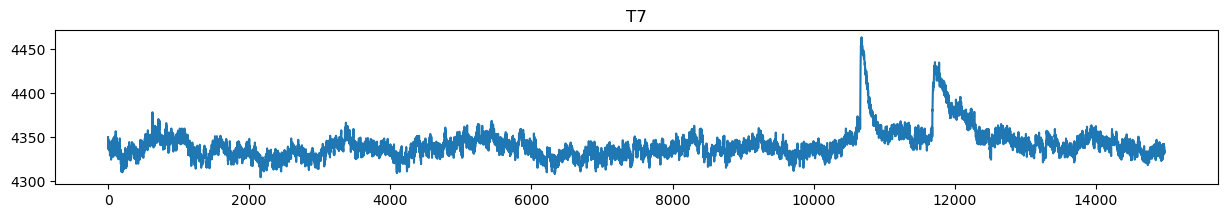

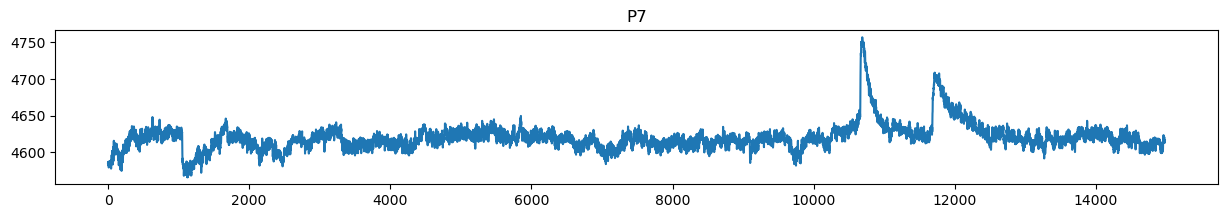

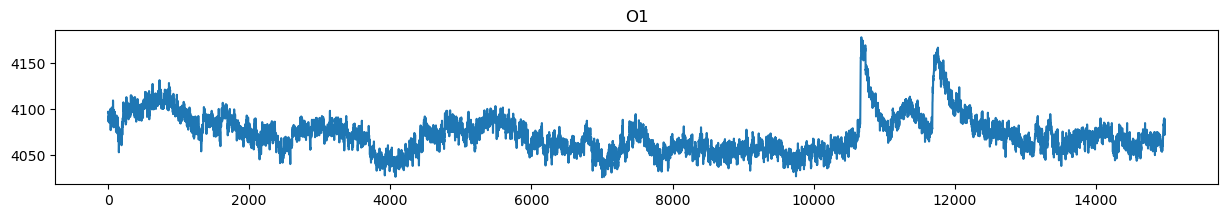

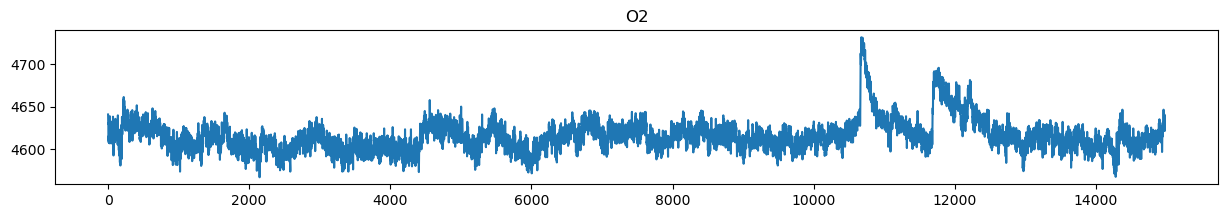

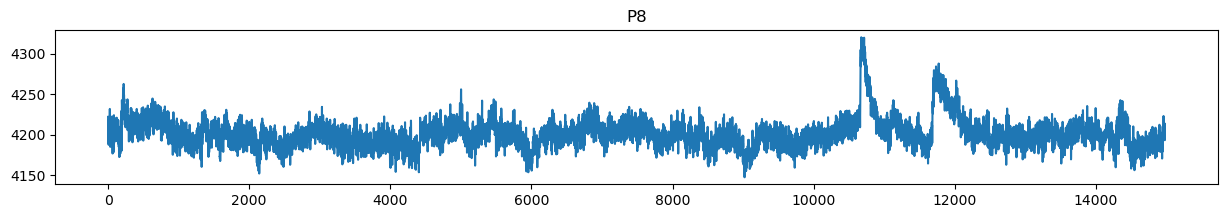

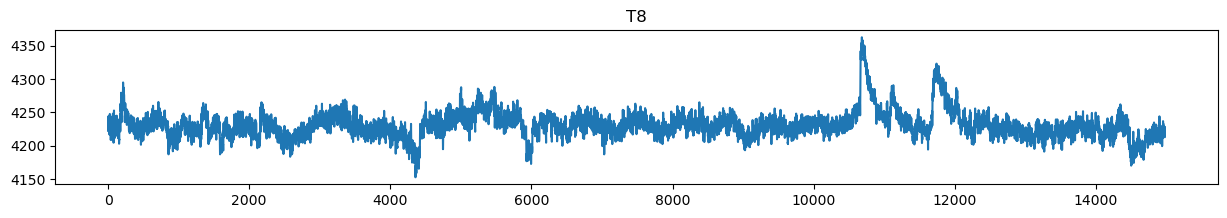

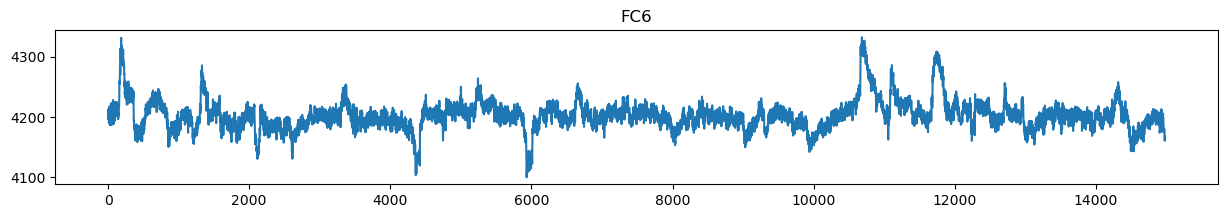

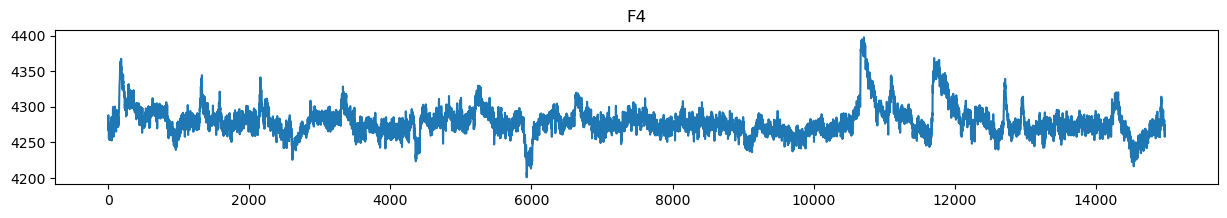

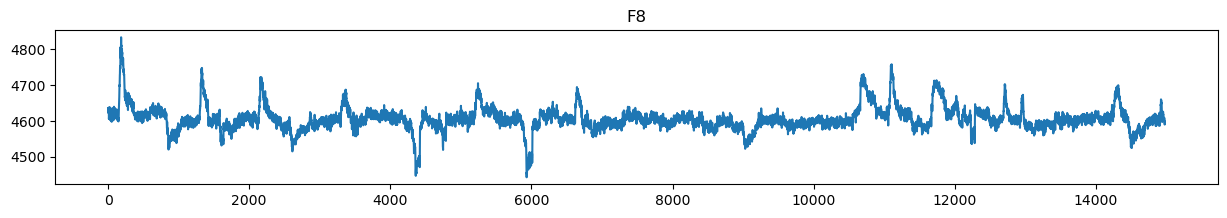

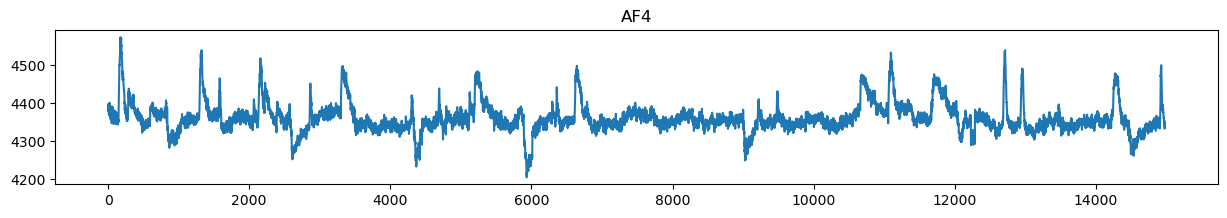

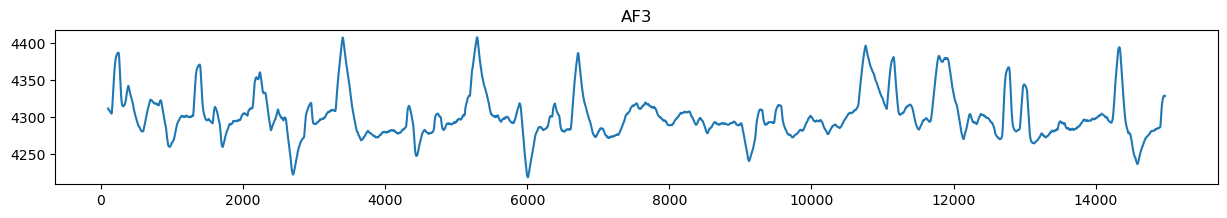

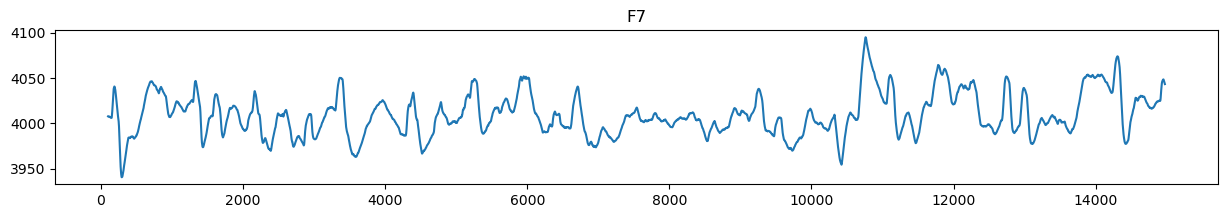

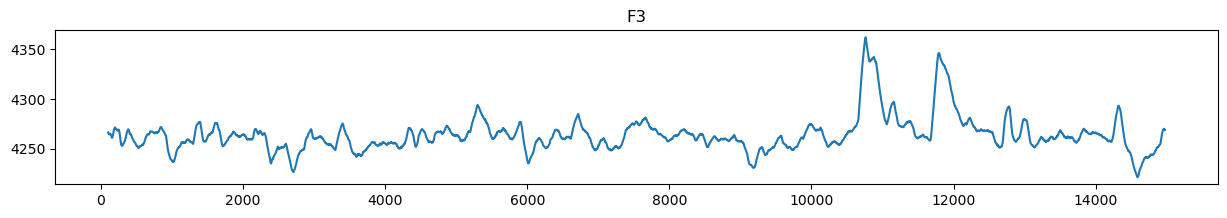

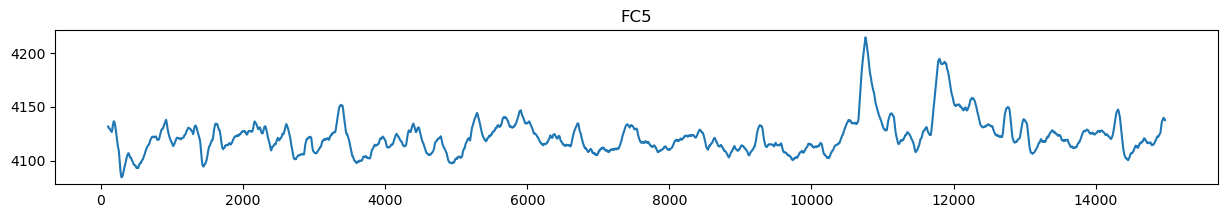

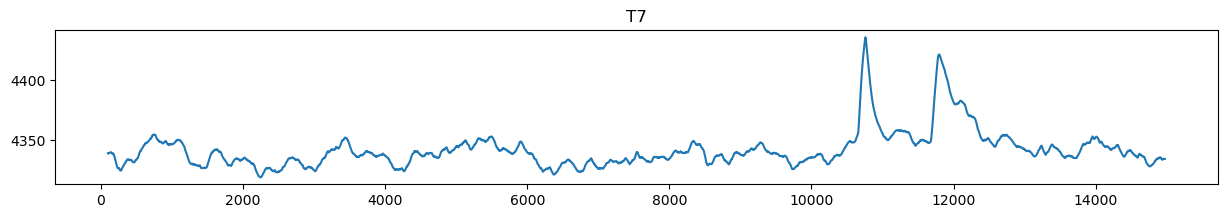

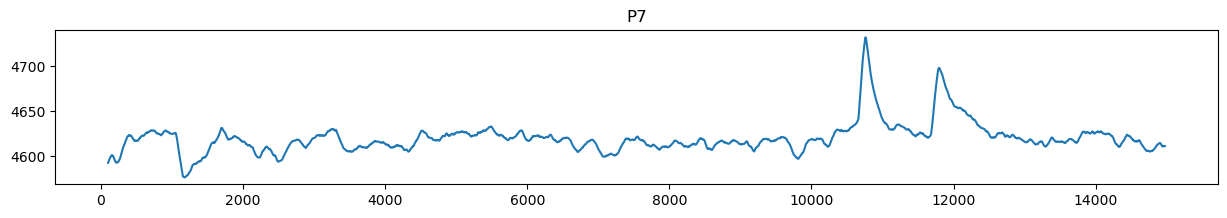

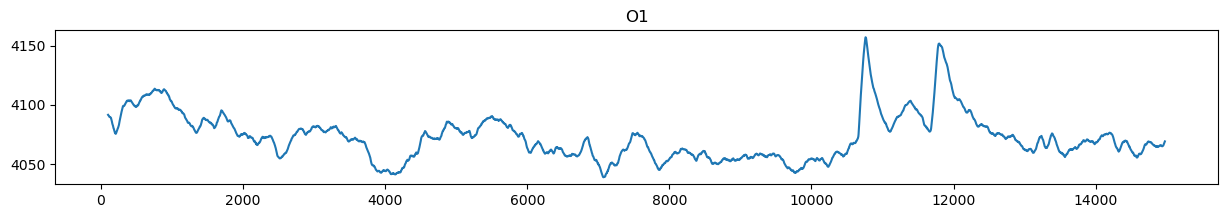

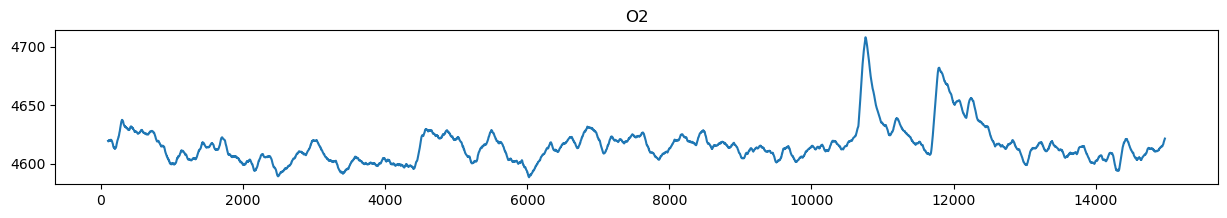

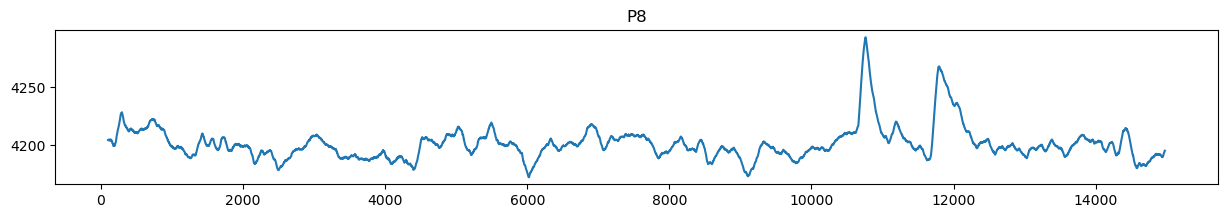

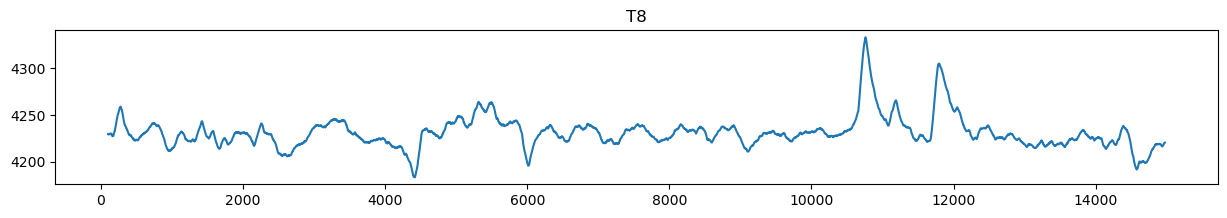

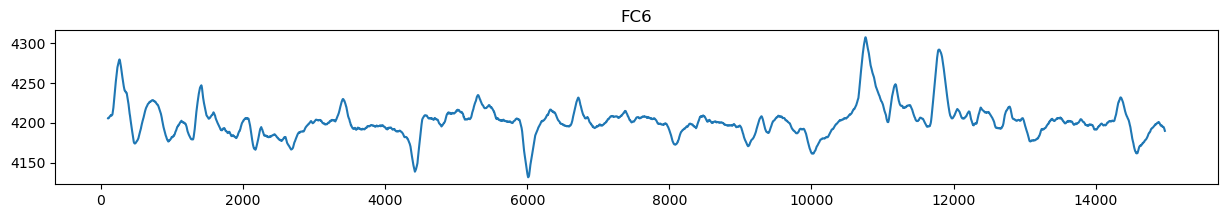

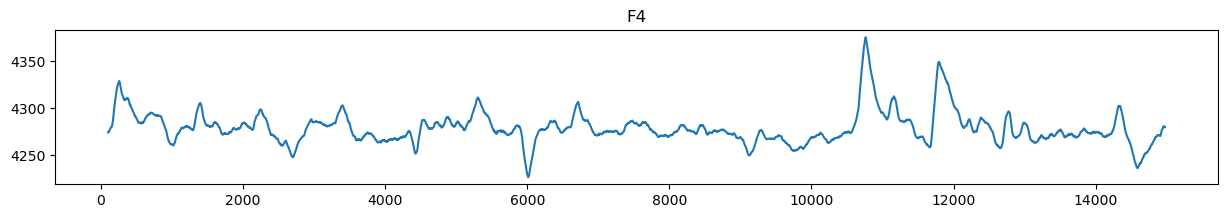

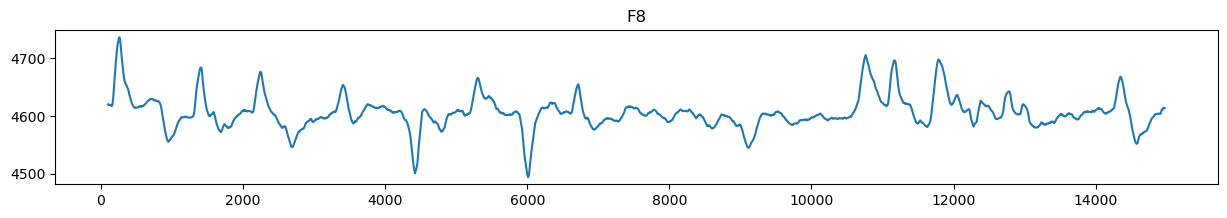

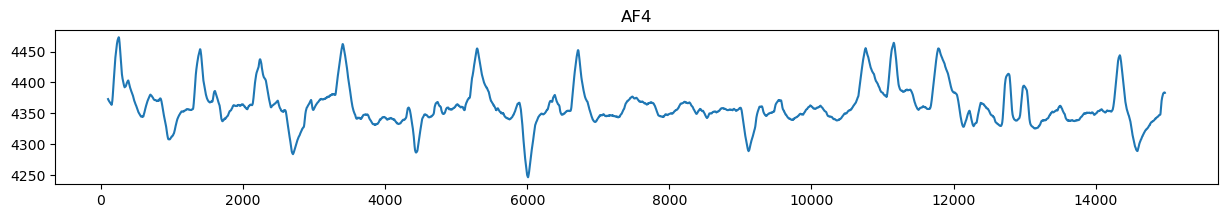

<Axes: xlabel='eyeDetection', ylabel='Count'>

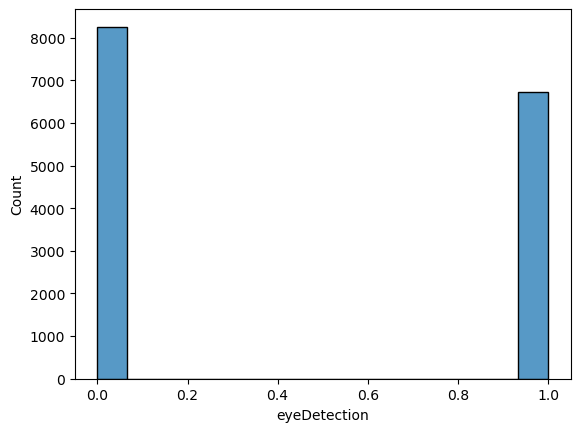

In [60]:
dfzscore=stats.zscore(data)
zscorelist=np.abs(dfzscore)
filter=(zscorelist<4).all(axis=1)
df=data[filter]
df=df.reset_index(drop=True)
dfplot=df.drop(columns='eyeDetection')
for i in dfplot.columns:
    dfplot[i].plot(figsize=(15,2),title=i)
    plt.show()

windowsize=100
for i in dfplot.columns:
    dfplot[i].rolling(window=windowsize,center=False).mean().plot(figsize=(15,2),title=i)
    plt.show()

sns.histplot(data=data,x='eyeDetection')

In [62]:
df2 = data.copy()
y= df2.pop('eyeDetection')
x= df2

In [63]:
y

0        0
1        0
2        0
3        0
4        0
        ..
14975    1
14976    1
14977    1
14978    1
14979    1
Name: eyeDetection, Length: 14980, dtype: int64

In [64]:
x

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77


In [78]:
# x_new = StandardScaler().fit_transform(x)

# x_new = pd.DataFrame(x_new) 
# x_new.columns = x.columns

In [84]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [85]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((11984, 14), (2996, 14), (11984,), (2996,))

In [86]:
# x_train = np.array(X_train).reshape(-1,14,1)
# x_test = np.array(X_test).reshape(-1,14,1)

# x_train.shape, x_test.shape,y_train.shape,y_test.shape

In [87]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# 데이터를 텐서로 변환
train_data = TensorDataset(torch.FloatTensor(X_train.values), torch.LongTensor(y_train.values))
test_data = TensorDataset(torch.FloatTensor(X_test.values), torch.LongTensor(y_test.values))

# DataLoader 설정
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [75]:
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 64)  # 입력 차원에서 64 노드로
        self.layer2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)  # 이진 분류의 경우 출력 차원은 1

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output(x)
        return x

model = NeuralNet()

In [76]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [77]:
from sklearn.model_selection import train_test_split
from scipy import stats

# Z-점수로 특성 데이터 정규화
X = stats.zscore(data.drop(columns='eyeDetection'))
y = data['eyeDetection'].values

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 파이토치 데이터셋 및 데이터로더 생성
import torch
from torch.utils.data import TensorDataset, DataLoader

train_data = TensorDataset(torch.FloatTensor(X_train), torch.LongTensor(y_train))
test_data = TensorDataset(torch.FloatTensor(X_test), torch.LongTensor(y_test))

batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

ValueError: could not determine the shape of object type 'DataFrame'